**Peyton Wong**

---

# **Global Air Quality Analysis**  

I will be exploring the global air quality (Dec 2023-Dec 2024) dataset from Kaggle.

This dataset focuses on CO, CO2, NO2, SO2, O3, PM2.5, PM10 levels in six major cities, along with its Air Quality Index (AQI).

I will be focusing my analysis on the AQI, thinking about the linear relationship between these air pollutants and rising AQI.

---



# **1. Data Wrangling Steps**

In this step, you'll notice that the dataset I used is modified slightly from the original. Before I started wrangling the data in Python, I transformed the data in Excel to have the first row became the header. Soon after, I learned I could do this in Pandas. However, I got too far in my analysis to go back

**Summary of my wrangling steps:**  
1. Identified and fixed the missing values (CO2_filled)   
2. Checked data types in each column and modified where necessary (datetime)  
3. Split the date column into year, month, and day  
4. Created a new column called "quality_average" and experimented with pivot/melt to see how the average shifts over each month

In [ ]:
# I will be using pandas to work with the Air_Quality_Final_Dataset.csv file

# Please make sure that Air_Quality_Final_Dataset.csv is in sample_data folder in Colab
import pandas as pd

# The CSV file will be directed as an absolute path
air_quality_df = pd.read_csv('/content/sample_data/Air_Quality_Final_Dataset.csv')


In [ ]:
# Here, I will do a general check on the dataset

# Check the shape of the DataFrame (rows, columns)
print(air_quality_df.shape)

# Randomly sample 10 rows
print(air_quality_df.sample(10).round(2))

# Overview of column types, non-null counts, and memory usage
print(air_quality_df.info())

# Descriptive statistics for numeric columns
print(air_quality_df.describe().round(2))


(52704, 11)
             Date        Time      City   CO    CO2   NO2   SO2   O3  PM2.5  \
47708  2024-06-06  1:00:00 AM    Sydney   84    NaN   6.0   1.9   49    6.6   
39832  2024-07-14  9:00:00 AM  New York  284    NaN  11.5   9.1  167   19.3   
41212  2024-09-09  9:00:00 AM  New York  331    NaN  31.3   7.7   37   19.5   
19980  2024-04-10  5:00:00 AM     Dubai  292    NaN  24.3  10.2  121   25.6   
11294  2024-04-14  7:00:00 AM     Cairo  174    NaN  11.8  17.2  117   18.7   
9467   2024-01-29  3:00:00 AM     Cairo  206    NaN  15.0  29.3   86    9.7   
51425  2024-11-08  9:00:00 AM    Sydney   91  438.0   8.5   3.2   46   12.7   
8068   2024-12-01  8:00:00 AM  Brasilia  209  442.0  10.3   3.0   53   12.3   
9769   2024-02-10  5:00:00 AM     Cairo  273    NaN  44.2  25.3   29   31.9   
39612  2024-07-05  5:00:00 AM  New York  291    NaN  22.4   7.7   57   23.1   

       PM10    AQI  
47708  12.1  19.60  
39832  27.8  66.73  
41212  28.3  19.84  
19980  74.7  83.14  
11294  27.3  

In [ ]:
# I will define the missing values in each column of my dataset
missing_air_quality = air_quality_df.isna().sum()
print(missing_air_quality)

Date         0
Time         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64


In [ ]:
# It appears that the missing data may be related to a MAR case

# From observation, the rows that have CO2 values fall around the 439.0-450.0 range

# My strategy is to fill the missing values with it's median
median_carbon_dioxide = air_quality_df["CO2"].median()

# Fill missing 'CO2' with median
air_quality_df["CO2_filled"] = air_quality_df["CO2"].fillna(median_carbon_dioxide)

# Confirm median filling method worked
print("Missing 'CO2' before:", air_quality_df["CO2"].isna().sum())
print("Missing 'CO2_filled' after:", air_quality_df["CO2_filled"].isna().sum())


Missing 'CO2' before: 43056
Missing 'CO2_filled' after: 0


In [ ]:
# Here, I want to confirm the dtypes of all columns
print(air_quality_df.dtypes)

Date           object
Time           object
City           object
CO              int64
CO2           float64
NO2           float64
SO2           float64
O3              int64
PM2.5         float64
PM10          float64
AQI           float64
CO2_filled    float64
dtype: object


In [ ]:
# It appears that the date column is in the object dtypes

# Lets transform the date column to fall under datetime category
air_quality_df['Date'] = pd.to_datetime(air_quality_df['Date'])

# Then, I will go to split the date column by year, month and day for analysis
air_quality_df['Year'] = air_quality_df['Date'].dt.year
air_quality_df['Month'] = air_quality_df['Date'].dt.month
air_quality_df['Day'] = air_quality_df['Date'].dt.day

# I will print this code to test that it worked
print(air_quality_df[['Date', 'Year', 'Month', 'Day']])


            Date  Year  Month  Day
0     2023-12-31  2023     12   31
1     2023-12-31  2023     12   31
2     2023-12-31  2023     12   31
3     2023-12-31  2023     12   31
4     2023-12-31  2023     12   31
...          ...   ...    ...  ...
52699 2024-12-31  2024     12   31
52700 2024-12-31  2024     12   31
52701 2024-12-31  2024     12   31
52702 2024-12-31  2024     12   31
52703 2024-12-31  2024     12   31

[52704 rows x 4 columns]


In [ ]:
# I will double check all dtypes of each category
# The date column should have a category type, with the new columns being int64
# Also confirming that CO2_filled is in our database
print(air_quality_df.dtypes)

Date          datetime64[ns]
Time                  object
City                  object
CO                     int64
CO2                  float64
NO2                  float64
SO2                  float64
O3                     int64
PM2.5                float64
PM10                 float64
AQI                  float64
CO2_filled           float64
Year                   int32
Month                  int32
Day                    int32
dtype: object


In [ ]:
# I will inspect duplicates in my Year and Month column
duplicates = air_quality_df.groupby(['Year', 'Month']).size()
print(duplicates[duplicates > 1])

Year  Month
2023  12         48
2024  1        4464
      2        4176
      3        4458
      4        4320
      5        4464
      6        4320
      7        4464
      8        4464
      9        4320
      10       4464
      11       4326
      12       4416
dtype: int64


In [ ]:
# Lastly, I want to pivot and melt this data to have a general understanding of air quality over time

# Lets create this new column
cols_to_avg = ['CO', 'CO2_filled', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
air_quality_df["quality_average"] = air_quality_df[cols_to_avg].mean(axis=1).round(2)

# Group by Year and Month and calculate average quality
monthly_avg = air_quality_df.groupby(['Year', 'Month'])['quality_average'].mean().round(2).reset_index()

# Now pivot one value per month by year
air_quality_wide = monthly_avg.pivot(index='Year', columns='Month', values='quality_average')
air_quality_wide


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.10
2024,126.12,121.11,124.94,119.91,118.92,119.5,122.64,124.56,125.21,122.43,126.55,127.28


In [ ]:
# Melt back to long format
air_quality_long = air_quality_wide.reset_index().melt(id_vars='Year', var_name='Month', value_name='quality_average')
air_quality_long

# The column 2023 in Year will show NaN types, as the data is only record from December 2023

,Year,Month,quality_average
0,2023,1,NaN
1,2024,1,126.12
2,2023,2,NaN
3,2024,2,121.11
4,2023,3,NaN
5,2024,3,124.94
6,2023,4,NaN
7,2024,4,119.91
8,2023,5,NaN
9,2024,5,118.92


# **2. Univariate plots**

In this section, along with the multivariate plots, I will be experimenting with the dataset to see how air pollutants correlate with the cities and AQI.

Some of these plots did not make the cut in my report, but I want to show how I experimented with using this dataset.

(CUT) = Did not make the report

**To summarize the univariate plots:**
1. Histogram to see AQI distribution
2. Box plot to observe S02 levels in each city (CUT)
3. Group-bar chart to analyze PM2.5 and PM10 levels in each city

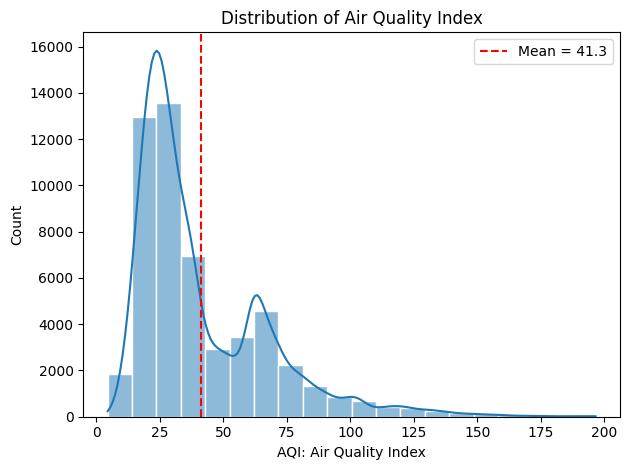

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Histogram to see AQI distribution

# Create 'fig' folder in Colab environment
os.makedirs("fig", exist_ok=True)

# Create histogram
sns.histplot(air_quality_df["AQI"], bins=20, kde=True, color="#1f77b4", edgecolor="white")

# Mean line
mean_val = air_quality_df["AQI"].mean()
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean = {mean_val:.1f}")

# Customize histogram
plt.xlabel("AQI: Air Quality Index")
plt.title("Distribution of Air Quality Index")
plt.legend()
plt.tight_layout()

# Save figure in 'fig/' folder
plt.savefig("fig/aqi_distribution.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


The histogram is right-skewed with a heavy tail. The count of AQI falls between the 25.0-45.0 with outliers.

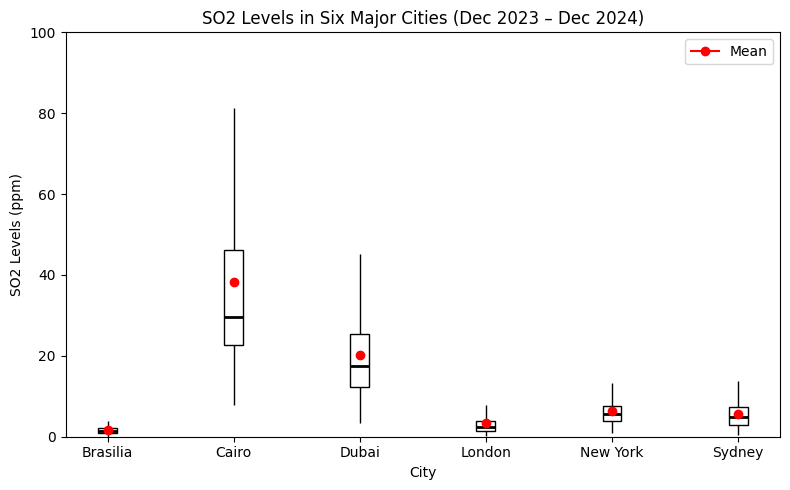

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Lets observe SO2 levels measured by city

# Calculate the SO2 mean per city
# This is so I have a relative understanding of each city's averages
city_means = air_quality_df.groupby("City")["SO2"].mean().round(2)

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(
    data=air_quality_df,
    x="City",
    y="SO2",
    width=0.15,
    color="white",
    showcaps=False,
    fliersize=0,
    boxprops=dict(edgecolor="black", linewidth=1),
    whiskerprops=dict(color="black", linewidth=1),
    medianprops=dict(color="black", linewidth=2),
    ax=ax
)

# I will add mean SO2 points to each box using a for loop
# This was with help from GPT, as I got confused with how to create this
for i, city in enumerate(city_means.index):
    mean_val = city_means[city]
    ax.plot(i, mean_val, marker='o', color='red', label='Mean' if i == 0 else "", zorder=3)

# Customize the plot
ax.set_title("SO2 Levels in Six Major Cities (Dec 2023 – Dec 2024)")
ax.set_ylabel("SO2 Levels (ppm)")
ax.set_xlabel("City")
ax.set_ylim(0, 100)  # ✅ Limit y-axis to 0–100
ax.legend()
plt.tight_layout()

# Show plot
plt.show()

Cairo appears to have the most SO2 levels out of the cities. However, the long line in Cairo could be the result of some outliers. Why are SO2 levels so high in Cairo?

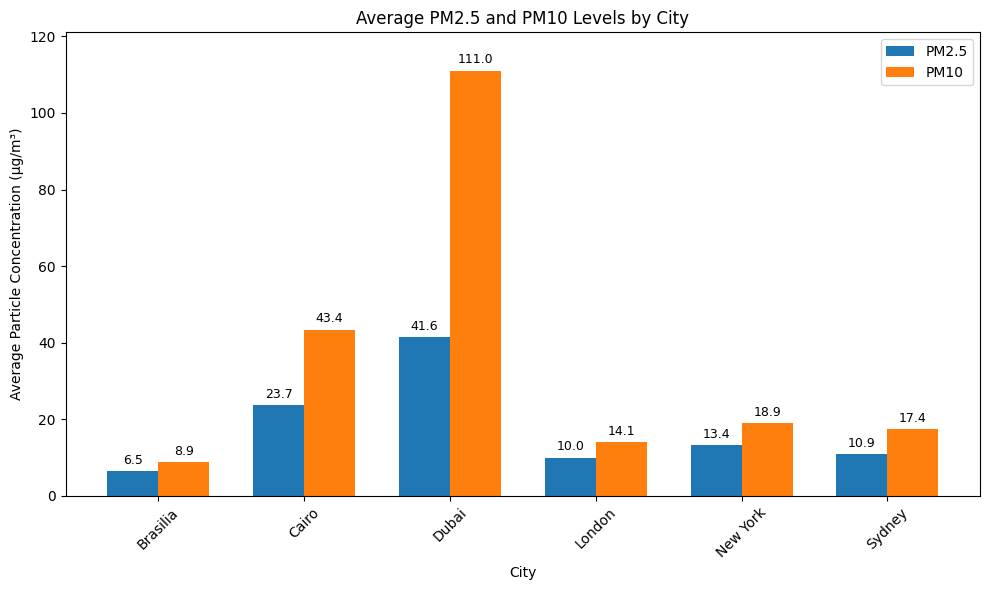

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# I will create a grouped bar chart, comparing PM2.5 and PM10 in each city

# Create 'fig' directory if it doesn't exist
os.makedirs("fig", exist_ok=True)

# Calculate average PM2.5 and PM10 per city
pm_averages = air_quality_df.groupby("City")[["PM2.5", "PM10"]].mean().round(2)

# Define bar positions
cities = pm_averages.index.tolist()
x = np.arange(len(cities))
width = 0.35

# Plot grouped bars
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, pm_averages["PM2.5"], width, label="PM2.5", color="#1f77b4")
bars2 = ax.bar(x + width/2, pm_averages["PM10"], width, label="PM10", color="#ff7f0e")

# Customize chart
ax.set_title("Average PM2.5 and PM10 Levels by City")
ax.set_xlabel("City")
ax.set_ylabel("Average Particle Concentration (µg/m³)")
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45)
ax.legend()
ax.set_ylim(0, max(pm_averages.max()) + 10)

# Add data labels
# Help from GPT to polish this nested loop
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.1f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
plt.tight_layout()

# Save the figure to the fig folder
fig.savefig("fig/pm_city_comparison.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


Observing this grouped bar chart, PM10 is significantly higher in Dubai. I wonder how much this will impact our AQI.


# 3. Multivariate plots

Just like the univariate plots, I will continue my analysis to see how air pollutants correlate with the AQI and each city.

(CUT) = Did not make the report

**To summarize the multivariate plots:**
1. FacetGrid to analysis air quality over the first four days in January 2024 (CUT)
2. Heatmap to observe the air quality average of each month (CUT)
2. Heatmap to observe which months have the highest AQI
3. Scatterplots to observe which cities have rising SO2 and O3 levels (CUT)

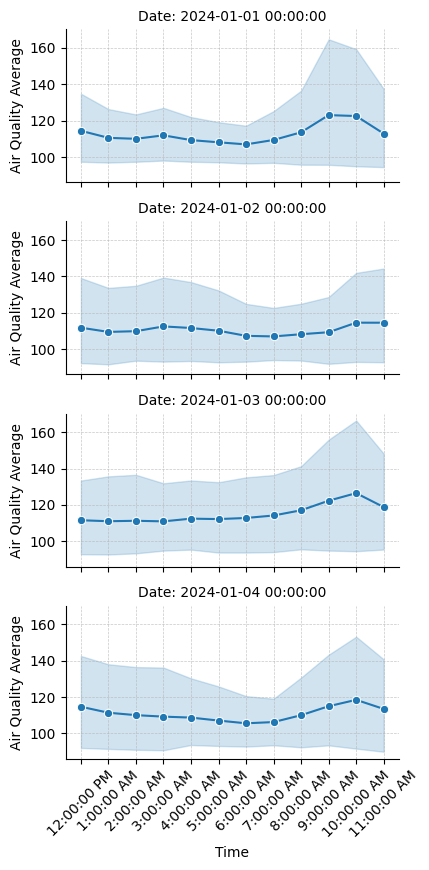

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# FacetGrid to show air quality within the first four dates of 01/2024

# Firstly, I will create a 'quality_average' column
cols_to_avg = ['CO', 'CO2_filled', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
air_quality_df['quality_average'] = air_quality_df[cols_to_avg].mean(axis=1).round(2)

# Then, extract the first 4 unique dates
first_four_dates = air_quality_df['Date'].drop_duplicates().iloc[1:5]

# Then filter the dataset
subset_df = air_quality_df[air_quality_df['Date'].isin(first_four_dates)]

# Now create the FacetGrid
facet = sns.FacetGrid(subset_df, row="Date", height=2.2, aspect=2, sharey=True)
facet.map_dataframe(sns.lineplot, x="Time", y="quality_average", marker="o", color="#1f77b4")

# Then formatting both titles and axis labels
facet.set_titles("Date: {row_name}")
facet.set_axis_labels("Time", "Air Quality Average")

# Fixing the overall layout, creating gridlines and linestyle
for ax in facet.axes.flatten():
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

From this FacetGrid, I noticed that the rows in the Time column are showing inconsistencies in the AM/PM range, specifcally 1AM-6AM when it reaches 12pm. I believe this manipulates the data here.

But, air quality tends to worsen around 9AM-11AM slightly.

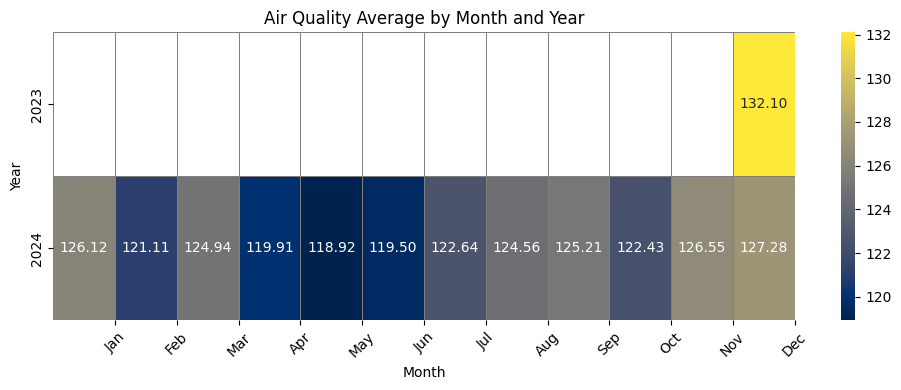

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Using the same quality average column, I will create a heatmap
# I want to see which month has the highest average over the recorded period

# I will compute average quality per (Year, Month)
cols_to_avg = ['CO', 'CO2_filled', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
air_quality_df['quality_average'] = air_quality_df[cols_to_avg].mean(axis=1).round(2)

monthly_avg = air_quality_df.groupby(['Year', 'Month'])['quality_average'].mean().round(2).reset_index()

# Create a date column to filter the range and keep plotting order
monthly_avg['date'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))

# Filter from Dec 2023 to Dec 2024
mask = (monthly_avg['date'] >= '2023-12-01') & (monthly_avg['date'] <= '2024-12-31')
filtered_data = monthly_avg[mask]

# Pivot for heatmap (rows: Year, columns: Month)
heatmap_data = filtered_data.pivot(index='Year', columns='Month', values='quality_average')

# Create the heatmap that is colour-blind friendly

plt.figure(figsize=(10, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="cividis",
    linewidths=0.5,
    linecolor='gray'
)

# Customization
plt.title('Air Quality Average by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=45
)

# Show plot
plt.tight_layout()
plt.show()

This heatmap, I believe, has a big outlier in December 2023. Since the data is only recorded for half of 12/31/23, the quality average is going to be misleading.

If we look at the results for 2024, the colder months (January, November, December) and hotter months (July, August) tend to have a higher quality average.

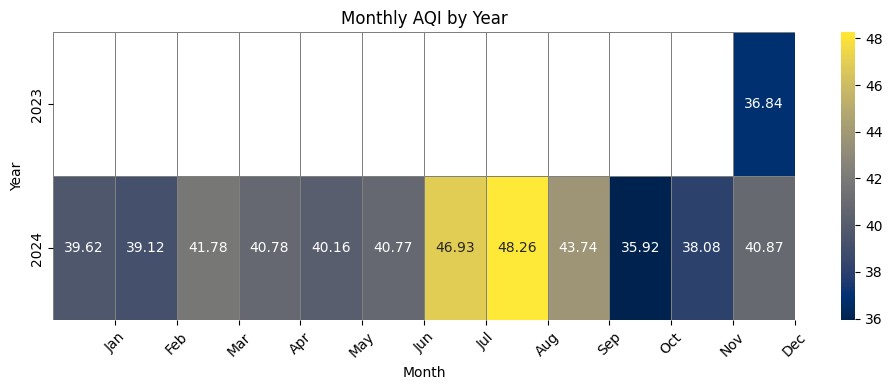

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Creating another heatmap to show average AQI per month

# Ensure the folder exists
os.makedirs("fig", exist_ok=True)

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="cividis",  # color-blind friendly
    linewidths=0.5,
    linecolor='gray'
)

# Customization
plt.title('Monthly AQI by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=45
)

plt.tight_layout()

# Save before showing the plot
plt.savefig("fig/monthly_aqi_heatmap.png", dpi=300)

# Show plot
plt.show()


This heatmap, I believe, has a big outlier in December 2023. Since the data is only recorded for half of 12/31/23, the average is going to be misleading.

If we judge these averages based on the 2024 record, the AQI seems to jump around the hotter months (July and August).

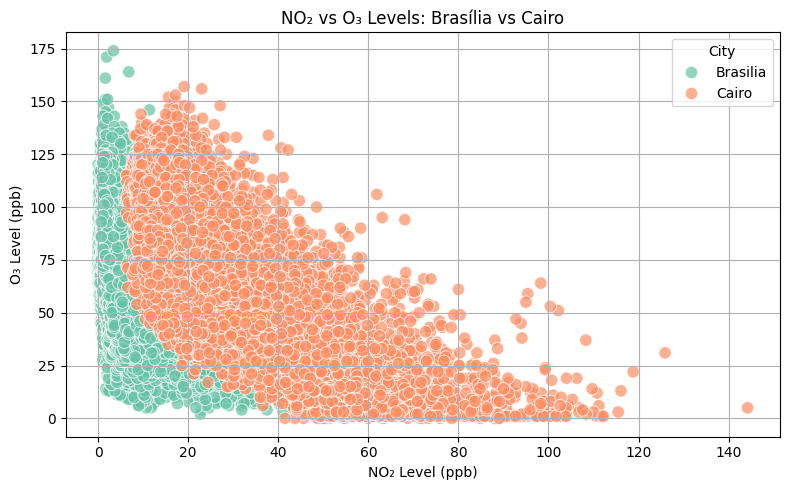

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Now, I want to experiment with scatter plots
# I will be comparing two cities at a time for easy readability

# Filter the DataFrame for Brasilia and Cairo
filtered_df = air_quality_df[air_quality_df["City"].isin(["Brasilia", "Cairo"])]

# Create the scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=filtered_df,
    x="NO2",
    y="O3",
    hue="City",
    palette="Set2",
    alpha=0.7,
    edgecolor="w",
    s=80
)

plt.title("NO₂ vs O₃ Levels: Brasília vs Cairo")
plt.xlabel("NO₂ Level (ppb)")
plt.ylabel("O₃ Level (ppb)")
plt.legend(title="City")
plt.grid(True)
plt.tight_layout()
plt.show()


From this scatterplot, it appears that Brasilia and Cairo hold similar O3 levels but different NO2 levels.

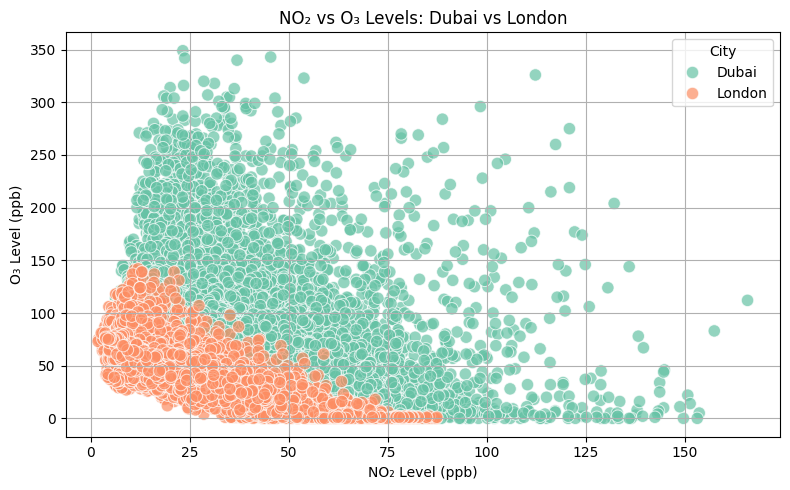

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Filter the DataFrame for Dubai and London
filtered_df = air_quality_df[air_quality_df["City"].isin(["Dubai", "London"])]

# Create the scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=filtered_df,
    x="NO2",
    y="O3",
    hue="City",
    palette="Set2",
    alpha=0.7,
    edgecolor="w",
    s=80
)

plt.title("NO₂ vs O₃ Levels: Dubai vs London")
plt.xlabel("NO₂ Level (ppb)")
plt.ylabel("O₃ Level (ppb)")
plt.legend(title="City")
plt.grid(True)
plt.tight_layout()
plt.show()


From this scatterplot, it appears that Dubai holds the most O3 and NO2 levels on record. Comparing to London, which feels smaller, is still contributing to these levels (see y-axis).

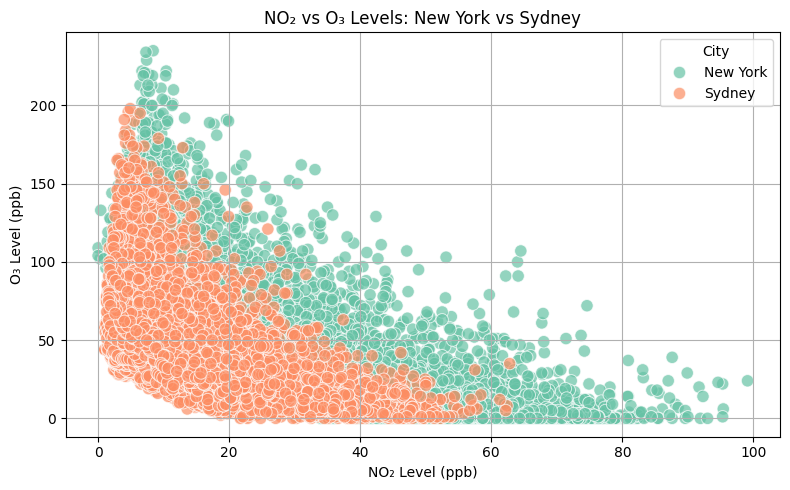

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Filter the DataFrame for New York and Sydney
filtered_df = air_quality_df[air_quality_df["City"].isin(["New York", "Sydney"])]

# Create the scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=filtered_df,
    x="NO2",
    y="O3",
    hue="City",
    palette="Set2",
    alpha=0.7,
    edgecolor="w",
    s=80
)

plt.title("NO₂ vs O₃ Levels: New York vs Sydney")
plt.xlabel("NO₂ Level (ppb)")
plt.ylabel("O₃ Level (ppb)")
plt.legend(title="City")
plt.grid(True)
plt.tight_layout()
plt.show()


From this scatterplot, it appears that New York holds the most O3 and NO2 levels compared to Sydney.

# **4. Descriptives + correlation**

In this section, I'll explore the descriptive statistics in the dataset along with using Pearson and Spearman correlations.

After creating my visuals, I decided I wanted to investigate the AQI column further, to see which air pollutant drives AQI the most.

**To summarize this section:**
1. Used describe() to gather descriptive statistics of the dataset
2. Pearson correlation of AQI with CO, CO2 (plot on heatmap for visualization) (CUT)
3. Pearson correlation of air quality average and AQI (heatmap visual) (CUT)
4. Pearson correlation of all air pollutants vs. AQI (heatmap visual)
5. Spearman correlation of AQI with CO, CO2 (CUT)



In [ ]:
# I will use the describe function to determine the datasets numerical values
print(air_quality_df.describe().round(2))

                                Date        CO      CO2       NO2       SO2  \
count                          52704  52704.00  9648.00  52704.00  52704.00   
mean   2024-07-01 04:39:00.983606528    258.26   462.35     24.10     12.57   
min              2023-12-31 00:00:00     52.00   434.00      0.00      0.00   
25%              2024-04-01 00:00:00    159.00   445.00      9.70      2.30   
50%              2024-07-01 00:00:00    213.00   453.00     18.90      5.70   
75%              2024-10-01 00:00:00    306.00   467.00     33.40     16.80   
max              2024-12-31 00:00:00   2045.00   884.00    165.90    239.70   
std                              NaN    159.59    33.77     19.36     17.27   

             O3     PM2.5      PM10       AQI  CO2_filled      Year     Month  \
count  52704.00  52704.00  52704.00  52704.00    52704.00  52704.00  52704.00   
mean      60.03     17.69     35.64     41.35      454.71   2024.00      6.51   
min        0.00      0.10      0.10      4.45

In [ ]:
# Observing this descriptive statistics, I would like to see AQI correlation to CO and CO2 levels
# However, keeping in mind the imputing of CO2 missing values with its median

import pandas as pd

# Select the variables of interest
corr_vars = ['CO', 'CO2_filled', 'AQI']
correlation_matrix = air_quality_df[corr_vars].corr(method='pearson')

# Print the matrix
print(correlation_matrix)

                  CO  CO2_filled       AQI
CO          1.000000    0.233907  0.537100
CO2_filled  0.233907    1.000000  0.038314
AQI         0.537100    0.038314  1.000000


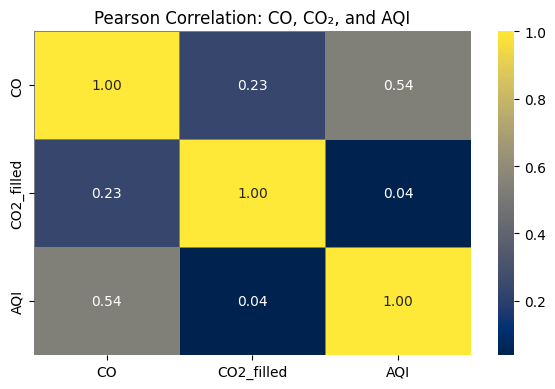

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Lets plot this on a heatmap

# Create the heatmap with a color-blind-friendly palette
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="cividis", fmt=".2f", linewidths=0.5, linecolor='gray')

# Customize labels
plt.title("Pearson Correlation: CO, CO₂, and AQI")
plt.tight_layout()
plt.show()


It appears, judging by this Pearson correlation, that AQI tend to rise when CO levels rise. However, CO2 levels seem to not correlate as much to AQI.

However, the data in CO2 is misleading because of missing value input.

                 quality_average       AQI
quality_average         1.000000  0.732254
AQI                     0.732254  1.000000


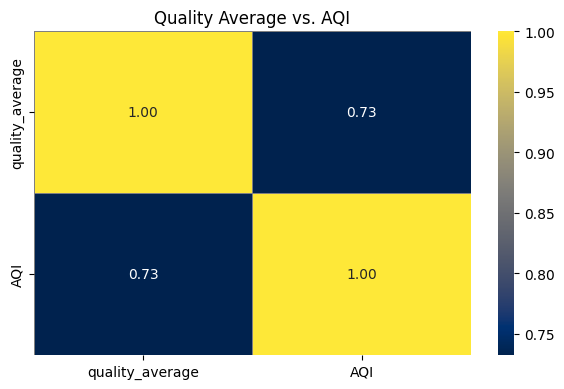

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Now I want to look at quality average and AQI

# Select the variables of interest
corr_vars = ['quality_average', 'AQI']
correlation_matrix = air_quality_df[corr_vars].corr(method='pearson')

# Print the matrix
print(correlation_matrix)

# Lets plot this on a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="cividis", fmt=".2f", linewidths=0.5, linecolor='gray')

# Customize labels
plt.title("Quality Average vs. AQI")
plt.tight_layout()
plt.show()


This heatmap just gives a general overview of all air pollutant variables as an average, in comparison to the AQI. This plot was just an experiment, as yes both quality average and AQI correlate with eachother, but doesn't specify why each air pollutants relate to AQI.

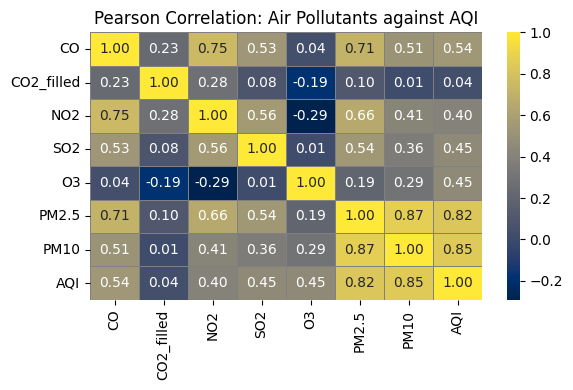

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Creating a pearson correlation heatmap between AQI and all air pollutants

# Ensure the fig/ folder exists
os.makedirs("fig", exist_ok=True)

# Select the variables of interest
corr_vars = ['CO', 'CO2_filled', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
correlation_matrix = air_quality_df[corr_vars].corr(method='pearson')

# Create the heatmap with a color-blind-friendly palette
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="cividis",  # color-blind friendly
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray'
)

# Customize labels
plt.title("Pearson Correlation: Air Pollutants against AQI")
plt.tight_layout()

# Save the heatmap as a PNG
plt.savefig("fig/pearson_correlation_heatmap.png", dpi=300)

# Show plot
plt.show()


Here is a better overview of each air pollutant variable with AQI. However, my main focus is just on AQI, the other relationships feel irrelevant here but can bring on quite interesting analysis (e.g: NO2 and CO). It appears that PM10 has the biggest correlation to AQI.

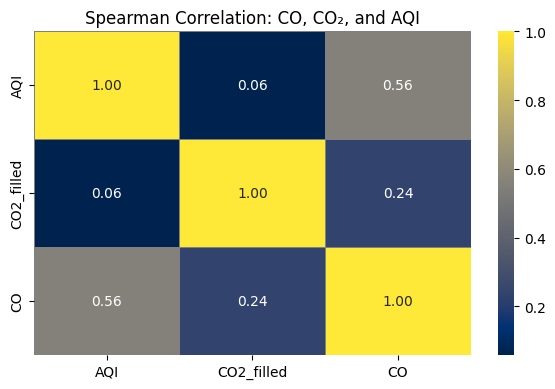

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Creating a Spearman correlation heatmap with CO and CO2 levels with AQI

# Calculate Spearman correlation
spearman_matrix = air_quality_df[['AQI', 'CO2_filled', 'CO']].corr(method='spearman')

# Plot the Spearman matrix
plt.figure(figsize=(6, 4))
sns.heatmap(spearman_matrix, annot=True, cmap="cividis", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Spearman Correlation: CO, CO₂, and AQI")
plt.tight_layout()
plt.show()


Genereal spearman relation to compare CO and CO2 levels with AQI. Both CO and CO2 hold a rank between 0-1, which examines a somewhat positive correlation to AQI.

# 5. Hypothesis test + effect size

I noticed from my data visuals and pearson correlation that PM10 has major effects on the AQI, therefore I want to test how much of a difference these two data types have.

**Do rising PM10 levels greatly affect the Air Quality Index (AQI)?**

**Summary:**    
1. Individual descriptive statistic test on AQI (including skewness and kurtosis)
2. T-test and p-value on AQI vs. PM10 (do PM10 levels affect the AQI significantly?)
3. Scatterplot with regression line to visualize rising PM10 with AQI
4. 95% Confident Interval to determine accuracy of AQI mean

In [ ]:
# Descriptive statistics on AQI

aqi_mean = air_quality_df['AQI'].mean()
aqi_median = air_quality_df['AQI'].median()
aqi_std = air_quality_df['AQI'].std()
aqi_var = air_quality_df['AQI'].var()
aqi_skew = air_quality_df['AQI'].skew()
aqi_kurt = air_quality_df['AQI'].kurt()

print(f"Mean (average):      {aqi_mean:.2f}")
print(f"Median:              {aqi_median:.2f}")
print(f"Standard Deviation:  {aqi_std:.2f}")
print(f"Variance:            {aqi_var:.2f}")
print(f"Skewness:            {aqi_skew:.2f}")
print(f"Kurtosis:            {aqi_kurt:.2f}")

Mean (average):      41.35
Median:              31.27
Standard Deviation:  26.63
Variance:            708.95
Skewness:            1.62
Kurtosis:            3.09


In [ ]:
# From the heatmap, it appears PM10 values correlate to AQI strongly
# Lets do a hypothesis

from scipy.stats import ttest_rel

# Drop missing values to ensure alignment
subset = air_quality_df[['AQI', 'PM10']].dropna()

# Run paired t-test
t_stat, p_value = ttest_rel(subset['AQI'], subset['PM10'])

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. PM10 has a significant effect on AQI.")
else:
    print("Result: Fail to reject the null hypothesis. No significant effect detected.")


T-statistic: 44.3242
P-value: 0.0000
Result: Reject the null hypothesis. PM10 has a significant effect on AQI.


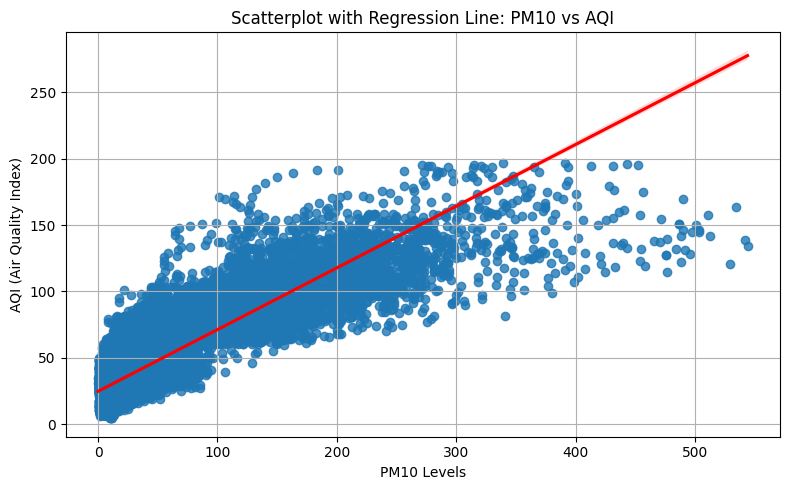

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Ensure the fig/ folder exists
os.makedirs("fig", exist_ok=True)

# Drop missing values
subset = air_quality_df[['AQI', 'PM10']].dropna()

# Create scatterplot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x='PM10', y='AQI', color='#1f77b4', line_kws={"color": "red"})
plt.title('Scatterplot with Regression Line: PM10 vs AQI')
plt.xlabel('PM10 Levels')
plt.ylabel('AQI (Air Quality Index)')
plt.grid(True)
plt.tight_layout()

# Save the plot as PNG in fig/ folder
plt.savefig("fig/pm10_vs_aqi_scatterplot.png", dpi=300)

# Show plot
plt.show()


From this scatterplot with regression line, it appears to be trending upwards. Therefore, PM10 levels do bring the AQI up as they rise.

In [ ]:
import numpy as np
from scipy import stats

# AQI mean and 95% CI interval analysis

# Drop missing values just in case
aqi_data = air_quality_df['AQI'].dropna()

# Sample mean and standard error
mean_aqi = np.mean(aqi_data)
sem_aqi = stats.sem(aqi_data)  # Standard error of the mean

# 95% confidence interval
confidence = 0.95
ci = stats.t.interval(confidence, df=len(aqi_data)-1, loc=mean_aqi, scale=sem_aqi)

print(f"Mean AQI: {mean_aqi:.2f}")
print(f"95% Confidence Interval for AQI: ({ci[0]:.2f}, {ci[1]:.2f})")


Mean AQI: 41.35
95% Confidence Interval for AQI: (41.12, 41.58)


In [ ]:
# Lets save the final modified CSV into a new folder
import os

# Ensure the 'output' folder exists
os.makedirs("output", exist_ok=True)

# Save the DataFrame as a CSV file
air_quality_df.to_csv("output/air_quality_final.csv", index=False)
